1\. **Radioactive decay chain**

${\rm Tl}^{208}$ decays to ${\rm Pb}^{208}$ with a half-lieve of 3.052 minutes. Suppose to start with a sample of 1000 Thallium atoms and 0 of Lead atoms.

* Take steps in time of 1 second and at each time-step decide whether each Tl atom has decayed or not, accordingly to the probability $p(t)=1-2^{-t/\tau}$. Subtract the total number of Tl atoms that decayed at each step from the Tl sample and add them to the Lead one. Plot the evolution of the two sets as a function of time  
* Repeat the exercise by means of the inverse transform method: draw 1000 random numbers from the non-uniform probability distribution $p(t)=2^{-t/\tau}\frac{\ln 2}{\tau}$ to represent the times of decay of the 1000 Tl atoms. Make a plot showing the number of atoms that have not decayed as a function of time

In [1]:
import numpy as np
import pandas as pd
from scipy import stats

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
%precision 4

import numpy.random as npr
npr.seed(143) # fix seed for reproducible result

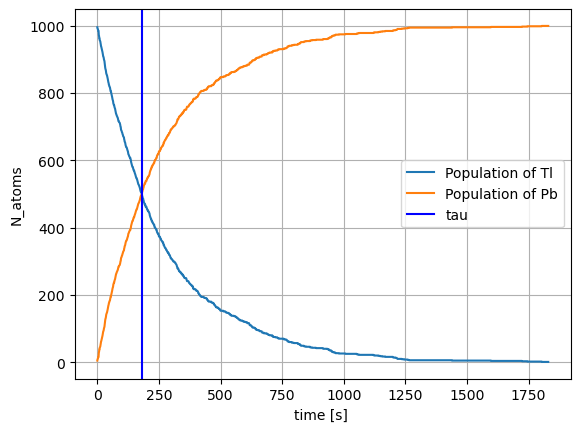

In [2]:

tau = 3.052*60
time = tau * 10

N_T = 1000
N_P = 0

N_Tplot=[]
N_Pplot=[]
time_plot=[]

def p(t):
    return 1-2**(-t/tau)
pdec=p(1)

for i in range(0,int(time),1):
    k = npr.rand(N_T)
    if N_T > 0:
        z = len(k[k < pdec])
        N_Tplot.append(N_T-z)
        N_Pplot.append(N_P+z)
        N_T-=z
        N_P+=z
        time_plot.append(i)

plt.plot(time_plot, N_Tplot, label='Population of Tl')
plt.plot(time_plot, N_Pplot, label='Population of Pb')
plt.axvline(x = tau, color = 'b', label = 'tau')
plt.xlabel('time [s] ')
plt.ylabel('N_atoms')
plt.legend()
plt.grid()

In the next exercise I'm assuming that all the atoms have already decayed and the output of the invtras_p is the interval of time in which the atoms have decayed. The answer is normalized in order to be fitted by the given exponential pdf(z)

Text(0, 0.5, 'N_Ti Atoms')

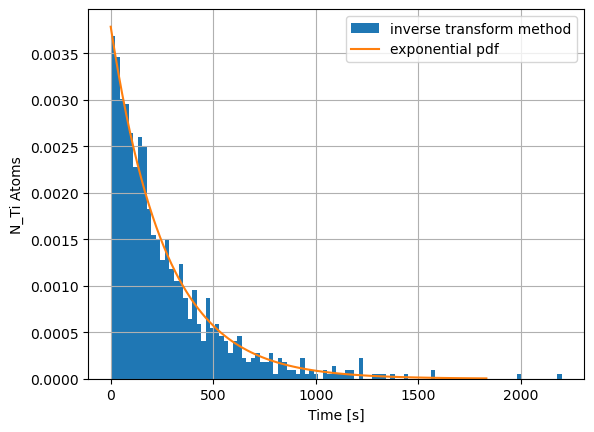

In [3]:
def pdf(z):
    return 2**(-z/tau)*(np.log(2))/tau

def invtras_p(z):
    return -tau*np.log2(1-z)

z = npr.uniform(size=1000)
plt.hist(invtras_p(z), bins=100, density=True,label='inverse transform method')

t = np.linspace(0, tau*10, 100)
plt.plot(t, pdf(t), label='exponential pdf')

plt.legend()
plt.grid()
plt.xlabel('Time [s]')
plt.ylabel('N_Ti Atoms')

2\. **Rutherford Scattering**

The scattering angle $\theta$ of $\alpha$ particles hitting a positively charged nucleus of a Gold atom ($Z=79$) follows the rule:

$$
\tan{\frac{1}{2} \theta} = \frac{Z e^2} {2\pi \epsilon_0 E b}
$$

where $E=7.7$ MeV and $b$ beam is the impact parameter. The beam is represented by a 2D gaussian distribution with $\sigma=a_0/100$ for both coordinates ($a_0$ being the Bohr radius). Assume 1 million $\alpha$ particles are shot on the gold atom.

Computing the fraction of particles that "bounce back",i.e. those particle whose scattering angle is greater than $\pi/2$ (which set a condition on the impact parameter $b$)

In [4]:
n=int(1e6)
z = npr.random(n)
angle = 2*np.pi*npr.random(n)

sig = 137 * 2 *10**(-6)/100.
r_square = -2*sig*np.log(1-z)
r = np.sqrt(r_square)
data = pd.DataFrame({'x':r*np.cos(angle), 'y':r*np.sin(angle)})


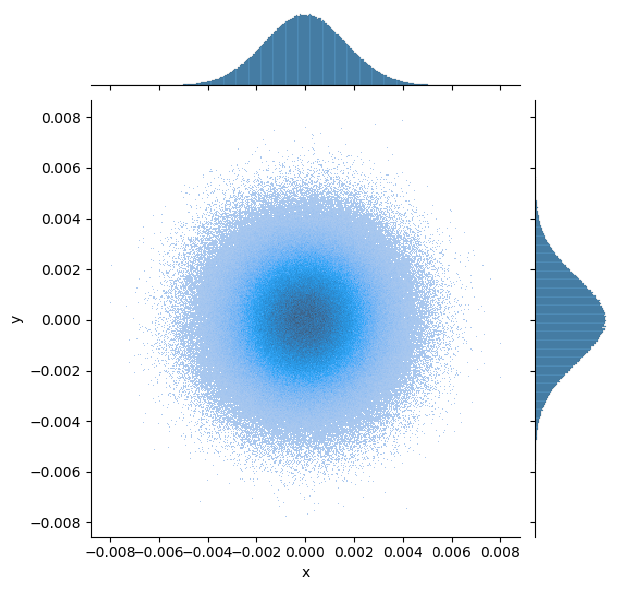

In [5]:
sns.jointplot(data=data, x='x', y='y', kind='hist')

In [6]:
def theta(b, Z=79, eps=1./(4*np.pi), E=7.7*1e6):
    return 2*np.arctan(Z/(2*np.pi*eps*E*b))
    
r_bb = r[theta(r)>(np.pi/2)]
print('Fraction of particle that bounces back:', len(r_bb)/len(r))

Fraction of particle that bounces back: 7.7e-05


3\. **Monte Carlo integration: hit/miss vs mean value method**

Consider the function 

$$f(x) =\sin^2{\frac{1}{x(2-x)}}$$

* Compute the integral of $f(x)$ between 0 and 2 with the hit/miss method. Evaluate the error of your estimate
* Repeat the integral with the mean value method. Evaluate the error and compare it with the previous one

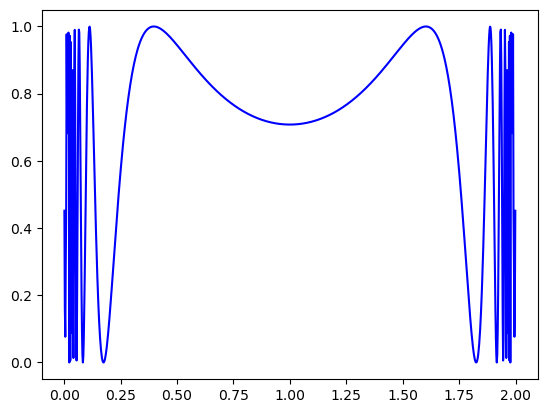

In [7]:
x = np.linspace(0.001,1.999,1000)
def f(t):
    return np.sin(1/(t*(2-t)))**2

plt.plot(x, f(x), '-b')

In [8]:
#hit/miss methods
N = 100000
count=0

for i in  range(N):
    x=2*npr.rand()
    y=npr.rand()
    if y<f(x): 
        count+=1
I = count*2 / N # A=2 is the area that contains the function 
print('Hit/miss method result:', I)

#in order to evaluate the error let's use a scipy function
from scipy.integrate import quad
res, _ = quad(f, 0, 2)
print('Scipy quad function:', res)

est_err = abs((res-I)/res)
print('Error of the hit/miss method:', est_err)

Hit/miss method result: 1.44584
Scipy quad function: 1.4516877509810684
Error of the hit/miss method: 0.004028242972441144


/tmp/ipykernel_304/648021693.py:15: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  res, _ = quad(f, 0, 2)


In [9]:
#mean value method 
N = 100000
sum_f=0
for i in range(N):
    x = 2*npr.rand()
    sum_f += f(x)

mean_f = (1/N)* sum_f
I2 = mean_f*2 #b-a in the integration is egual to 2 
est_err2 = abs(I2-res)/res
print('integral obtained by the mean value method', I2)
print('the estimation error is:', est_err2)
print('Is the error from the hit/miss method lower than the mean value method?', est_err > est_err2 )

integral obtained by the mean value method 1.4508882051237662
the estimation error is: 0.0005507698585745447
Is the error from the hit/miss method lower than the mean value method? True


4\. **Monte Carlo integration in high dimension**

* Start of by computing the area of a circle of unit radius, by integrating the function 

$$
f(x,y)=
\left\{
\begin{array}{ll}
      1 & x^2+y^2\le 1 \\
      0 & {\rm elsewhere}
\end{array} 
\right.
$$

* Generalize the result for a 10D sphere



In [10]:
def f(x,y):
    if x**2+y**2 <= 1:
        return 1
    else:
        return 0

N=100000
V= 2*2 #our intervall of definition for x and y are [-1,1] for both of them
X = npr.uniform(low=-1, high=1, size=(N,2))
x, y = X[:,0], X[:, 1]
sum_f=0

for i in range(N):
    sum_f += f(x[i],y[i])/N

I=V*sum_f
print('the Integral with the mean value method is:', I)

the Integral with the mean value method is: 3.147639999996214


5\. **Monte Carlo integration with importance sampling** 

Calculate the value of the integral:

$$
I=\int_0^1 \frac{x^{-1/2}}{e^x+1} dx
$$

using the importance sampling method with $w(x)=1/\sqrt{x}$. You should get a result about 0.84

In [17]:
def f(x):
    return (x**(-1/2))/(np.exp(x)+1)

def w(x):
    return 1/np.sqrt(x)

N = 100000
sum_f = 0
for i in range(N):
    x = npr.random()
    sum_f += f(x)/ (w(x)*N)

res, _ = quad(w, 0, 1)
I = sum_f * res
print('Importance sampling method:', I)

res2, _ = quad(f, 0, 1)
print('Integral obtained by quad', res2)

Importance sampling method: 0.7605056545325546
Integral obtained by quad 0.8389329600133838
